<a href="https://colab.research.google.com/github/Erodriguezmu/game-of-life/blob/main/Train_YoloV3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bienvenido, en este archivo se verá cómo se entrena una red de YOLO, pero si sólo desea evaluar la que ya fue entrenada para reconcoer códigos QR, puede bajar hasta donde está el logo de yolo e ir ejecutando las casillas subsecuentes para descargar, comprobar y evaluar los resultados dados de esta red.



In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Jul 12 21:41:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect google drive**

Se espera que en el drive que se use para conectarse a la máquina virtual, se tenga una carpeta con el nombre yoloV3 para ir guardando los pesos cada cierto tiempo.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s "/content/gdrive/My Drive/" /mydrive
!ls /mydrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'18 septiembre CJEG.gdoc'
'2020-I Unal.gsheet'
 backup
'Cátedra sábado 07 08 2019.gdoc'
'Colab Notebooks'
'Copia de BadStore_212.iso'
'Documento sin título (1).gdoc'
'Documento sin título.gdoc'
'Formulario sin título.gform'
'Hoja de Vida Elkin David Yomayusa Torres A.pdf'
'hoja de vida Ing Johan Torres.pdf'
'Le Tranvia'
 Mamá
'Miércoles 11 de septiembre .gdoc'
 Molecules.ipynb
 Octave.gdoc
'Plantillas Slides'
'Proyecto Final - Gráfico de columnas 1.gs

**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13939, done.
remote: Total 13939 (delta 0), reused 0 (delta 0), pack-reused 13939
Receiving objects: 100% (13939/13939), 12.42 MiB | 10.79 MiB/s, done.
Resolving deltas: 100% (9524/9524), done.


**2) Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**3) Configure Darknet network for training YOLO V3**

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

En este punto se cambian las clases, max_batches y filters para que sean apropiados para la cantidad de objetos a reconocer.

Cómo se calculan:

*   max_batches = 2000 * clases
*   filters = (5 + clases)*3 [El 5 representa las capas de YOLO en la red]



In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

Se confirma la existencia o se crea la carpeta para guardar los pesos

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3"

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


Se crea el archivo de configuración para el entrenamiento, aquí se puede cambiar la carpeta para guardar los pesos de ser necesario, pero debe haberse creado un symlink para que quede en el drive y no en la máquina virtual.

In [ ]:
!echo "QR" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

Aquí se puede descargar una red ya entrenada, o se puede omitir y usar una con pesos actualizados para continuar desde cierto punto, es necesario que este archivo esté en la misma carpeta que se clono del repositorio de Darknet

In [ ]:
# Download weights darknet model 53
#!wget https://pjreddie.com/media/files/darknet53.conv.74
#!ls

3rdparty   CMakeLists.txt	   image_yolov3.sh	  README.md
backup	   darknet		   include		  results
build	   DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1  darknet.py		   LICENSE		  src
build.sh   darknet_video.py	   Makefile		  video_v2.sh
cfg	   data			   net_cam_v3.sh	  video_yolov3.sh
cmake	   image_yolov2.sh	   obj


**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

Las imágenes vienen acompañadas de las anotaciones de YOLO directamente en la misma carpeta.

In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
checkdir:  cannot create extraction directory: data/obj
           No such file or directory


In [ ]:
# Se asegura que sólo se tenga una clase para los BBOX en las imágenes
# Si el valor es diferente de 0, se cambiará a este,  si se quiere tener otros valores, no sería necesario usar esta parte, y dejar que entrene con más clases
# Obviamente se debe tomar en cuenta la configuración de la red para tensorflow con los valores acordes al número de clases
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

Revisar las imágenes que se van a usar para entrenar

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(len(images_list))
print(images_list)

95
['data/obj/IMG_3019.jpg', 'data/obj/IMG_2750.jpg', 'data/obj/mob_multi_IMG_20120226_161648.jpg', 'data/obj/IMG_2729.jpg', 'data/obj/img1.jpg', 'data/obj/IMG_20120226_161556.jpg', 'data/obj/IMG_2772.jpg', 'data/obj/20110817_066.jpg', 'data/obj/IMG_2738.jpg', 'data/obj/IMG_2759.jpg', 'data/obj/20110817_175.jpg', 'data/obj/20110817_089.jpg', 'data/obj/IMG_2730.jpg', 'data/obj/IMG_3018.jpg', 'data/obj/20110817_376.jpg', 'data/obj/IMG_20120226_151917.jpg', 'data/obj/IMG_20120226_145048.jpg', 'data/obj/IMG_2768.jpg', 'data/obj/IMG_2731.jpg', 'data/obj/IMG_2770.jpg', 'data/obj/IMG_3003.jpg', 'data/obj/IMG_2732.jpg', 'data/obj/IMG_2741.jpg', 'data/obj/IMG_3025.jpg', 'data/obj/IMG_2734.jpg', 'data/obj/IMG_3022.jpg', 'data/obj/IMG_2718.jpg', 'data/obj/IMG_2728.jpg', 'data/obj/20110817_326.jpg', 'data/obj/img2.jpg', 'data/obj/IMG_2737.jpg', 'data/obj/IMG_2727.jpg', 'data/obj/IMG_3024.jpg', 'data/obj/IMG_2766.jpg', 'data/obj/20110817_177.jpg', 'data/obj/IMG_2757.jpg', 'data/obj/IMG_20120226_162

Aquí es donde se dividen las imágenes entre las de train y las de validación, creando los dos archivos con los nombres apropiados, usando un 90% para entrenamiento y el resto para validación

In [ ]:
import random
#Desorder the list
reorderedList = random.sample(images_list, len(images_list))
#Get number of samples to train (90%)
train_samples = int(len(images_list)*0.9)

#Create training.txt file
file = open("data/train.txt", "w")
print(reorderedList[:train_samples])
file.write("\n".join(reorderedList[:train_samples]))
file.close()

#Create test.txt file
file = open("data/test.txt", "w")
print(reorderedList[train_samples:])
file.write("\n".join(reorderedList[train_samples:]))
file.close()

#Create training.txt file
# file = open("data/train.txt", "w")
# file.write("\n".join(images_list))
# file.close()

**6) Start the training**

En este punto, se pueden pasar parámetros para mostrar mejor el mAP en tiempo de entrenamiento y decidir cuándo detener el entrenamiento. Además, aquí es donde uno puede decir cuál red usar para continuar un entrenamiento previo, se usó para hacer el entrenamiento varias veces siguiendo con la red de los anteriores entrenamientos.

El avg loss está presente en las líneas del formato:

2617: 0.056457, **0.085830 avg loss**, 0.001000 rate, 14.772784 seconds, 167488 images, 6.291391 hours left

Y es la variable que más se debe monitorerar para entrenar una red que sea confiable. Para una red con bastantes imágenes (más de 1000) se podría llegar a un avg loss del 3% y sería aceptable, para una pequeña como la actual, se espera uno de 0.005%

In [ ]:
# Start the training
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
!./darknet detector train data/obj.data cfg/yolov3_training.cfg yolo.weights -dont_show -map

Se truncaron las últimas líneas 5000 del resultado de transmisión.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.853207, GIOU: 0.851516), Class: 0.999711, Obj: 0.992349, No Obj: 0.000638, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000157, iou_loss = 0.050804, total_loss = 0.050961 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.964022, GIOU: 0.963804), Class: 0.998885, Obj: 0.980914, No Obj: 0.000026, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.000236, iou_loss = 0.000715, total_loss = 0.000951 
 total_bbox = 49844, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.890141, GIOU: 0.889190), Class: 0.999814, Obj: 0.998798, No Obj: 0.002517, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000002, iou_loss = 0.032647, total_loss = 0.032649 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.886096, GIOU: 0.884191), Class: 0.999945, Obj: 0.

### Código para evaluar la red entrenada con YOLO

![texto alternativo](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/12/yologo_2.png)


In [ ]:
#Restaurar la ubicación inicial de la carpeta para ejecutar comandos
!cd /content/

## **Evaluación de la red**

En este archivo se toma la red entrenada y se carga en OpenCV para hacer la evaluación de las imágenes, la determinación de los BBOX la hace el módulo NMS de OpenCV, aunque hay otras opciones en python si se quisiera mejorar los tiempos aún más.

In [ ]:
import cv2
import numpy as np
import glob
import random
import os
import sys
from google.colab.patches import cv2_imshow

def evaluate(folder, mostrar):
  # para mostrar o no las ventanas en opencv de las imágenes con los BBOX
  if(mostrar == "y"):
    show = True
  else:
    show = False
  # print(len(sys.argv))
  # print(sys.argv)
  # #Look for arguments
  # if(len(sys.argv)>1):
  #     if(sys.argv[1] == "-h"):
  #         show = False
  # else:
  #     if(len(sys.argv)>1):
  #         print("ARGUMENT ERROR: Usage: " + sys.argv[0] + "-h to dont show images")
  # Load Yolo
  net = cv2.dnn.readNet("yolov3_training_final.weights", "yolov3_testing.cfg")
  print("Red cargada")
  # Name custom object
  classes = ["QR"]
  try:
      os.mkdir("detections")
      print("Carpeta creada")
  except:
      print("La carpeta ya existe")
  # Images path
  images_path = glob.glob(folder + "/*.jpg")
  print(images_path)
  #images_path = glob.glob(os.getcwd() + r"\*.jpg")
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  #Fucsia, para resaltar mejor
  colors = [[221, 16, 238]]
  # Random over the images
  random.shuffle(images_path)
  # loop through all the images
  for img_path in images_path:
      file_name = os.path.basename(img_path)
      #Open file to save scores to evaluate metrics
      f = open('detections/' + file_name.replace("jpg", "txt").replace("JPG", "txt"), "w+")
      # Loading image
      img = cv2.imread(img_path)
      img = cv2.resize(img, None, fx=0.4, fy=0.4)
      height, width, channels = img.shape
      # Detecting objects
      blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

      net.setInput(blob)
      outs = net.forward(output_layers)

      # Showing informations on the screen
      class_ids = []
      confidences = []
      boxes = []
      print(file_name)
      for out in outs:
          for detection in out:
              scores = detection[5:]
              #Sólo te tiene una clase para esta red, pero este valor mostraría si se encuentran de otras clases
              class_id = np.argmax(scores)
              confidence = scores[class_id]
              if confidence > 0.3:
                  
                  # Object detected
                  center_x = float(detection[0] * width)
                  center_y = float(detection[1] * height)
                  w = float(detection[2] * width)
                  h = float(detection[3] * height)

                  # Rectangle coordinates
                  x = float(center_x - w / 2)
                  y = float(center_y - h / 2)
                  # saving the values to a file to evaluate metrics
                  f.write(("{} {} {} {} {} {}\n").format(classes[0], detection[5], round(x), round(y), round(x + w), round(y + h)))
                  boxes.append([x, y, w, h])
                  confidences.append(float(confidence))
                  class_ids.append(class_id)
      f.close()
      #Evaluar los BBOX de los objetos reconocidos
      indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
      font = cv2.FONT_HERSHEY_PLAIN
      if(show):
        #Create BBOX and show image
          for i in range(len(boxes)):
              if i in indexes:
                  x, y, w, h = boxes[i]
                  label = str(classes[class_ids[i]])
                  color = colors[class_ids[i]]
                  cv2.rectangle(img, (round(x), round(y)), (round(x + w), round(y + h)), color, 2)
                  cv2.putText(img, label, (round(x), round(y)-5), font, 3, color, 2)
          #cv2.namedWindow(file_name, cv2.WINDOW_NORMAL) 
          cv2_imshow(img)
          key = cv2.waitKey(0)

Esta función convierte lo que son los labels creados para el entrenamiento de imágenes en el formato que necesita el proyecto para calcular las métricas de la red. Puede mostrar las imágenes si se desea directamente en el mismo notebook.

In [ ]:
import sys
import traceback

def convertYOLO(folder, show_img):
  # print(len(sys.argv))
  # print(sys.argv)
  #Look for arguments
  # if(len(sys.argv)>1):
  #     if(sys.argv[1] == "-h"):
  show = False
  if(show_img == "y"):
    #Show or hide images
    show = True
  #else:
   #   if(len(sys.argv)>1):
    #      print("ARGUMENT ERROR: Usage: " + sys.argv[0] + "-h to dont show images")

  # Name custom object
  classes = ["QR"]

  # Images path
  #images_path = glob.glob(os.getcwd() + r"\*.jpg")
  images_path = glob.glob(folder + "/*.jpg")

  colors = [[221, 16, 238]]
  try:
      os.mkdir("groundtruths")
      print("Carpeta creada")
  except:
      print("La carpeta ya existe")
  # Insert here the path of your images
  random.shuffle(images_path)
  # loop through all the images
  for img_path in images_path:
      # Loading image
      img = cv2.imread(img_path)
      img = cv2.resize(img, None, fx=0.4, fy=0.4)
      height, width, channels = img.shape

      # Showing informations on the screen
      class_ids = []
      confidences = []
      boxes = []
      file_name = os.path.basename(img_path)
      f = open(img_path.replace("jpg", "txt").replace("JPG", "txt"))
      f2 = open('groundtruths/' + file_name.replace("jpg", "txt").replace("JPG", "txt"), "w+")
      try:
          for line in f:
              values = line.split()
              class_id = 0
              center_x = float(values[1]) * width
              center_y = float(values[2]) * height
              w = float(values[3]) * width
              h = float(values[4]) * height

              # Rectangle coordinates
              x = float(center_x - w / 2)
              y = float(center_y - h / 2)
              f2.write(("{} {} {} {} {}\n").format(classes[0], round(x), round(y), round(x + w), round(y + h)))
              if(show):
                  boxes.append([x, y, w, h])
                  font = cv2.FONT_HERSHEY_PLAIN
                  for i in range(len(boxes)):
                      x, y, w, h = boxes[i]
                      label = str(classes[int(values[0])])
                      color = colors[int(values[0])]
                      cv2.rectangle(img, (round(x), round(y)), (round(x + w), round(y + h)), color, 2)
                      cv2.putText(img, label, (round(x), round(y + 30)), font, 3, color, 2)
      except Exception as err:
          print(img_path.replace("jpg", "txt"))
          print(line)
          print(values)
          traceback.print_tb(err.__traceback__)
      f.close()
      f2.close()
      if(show):
          cv2_imshow(img_path, img)
          # key = cv2.waitKey(0)
          # cv2.destroyWindow(file_name)
  # cv2.destroyAllWindows()

Crear script para descargar desde el drive un archivo público

In [ ]:
%%writefile wgetgdrive.sh
#!/bin/bash

# Get files from Google Drive

# $1 = file ID
# $2 = file name

URL="https://docs.google.com/uc?export=download&id=$1"
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate $URL -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$1" -O $2 && rm -rf /tmp/cookies.txt

Writing wgetgdrive.sh


Descargar las imágenes y los pesos de la red desde el drive para evaluarlas, también se pueden colcar los archivos en la carpeta desde donde el notebook esté corriendo directamente si es local, sólo se necesita que tenga los nombres apropiados

In [ ]:
!chmod +rx wgetgdrive.sh
!./wgetgdrive.sh 1FBvybMOjE4sizMqnkqbSCQAslOnLprdE images.zip
!./wgetgdrive.sh 1-Xr8wwEGR6ecP1jNOCsPso1N2XJO0mbF yolov3_training_final.weights
!./wgetgdrive.sh 1XqDqVufvFdB6ctSonqGTTBJTYVR57ouZ yolov3_testing.cfg

--2020-07-13 17:56:38--  https://docs.google.com/uc?export=download&confirm=obnX&id=1FBvybMOjE4sizMqnkqbSCQAslOnLprdE
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.102, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-1c-docs.googleusercontent.com/docs/securesc/uamk7t6f2iemcrleuhncnvg4ev5t39bc/46ppc3gcvcugplvsue4gc8t48oalu824/1594662975000/18207611712064192015/16492860687054341930Z/1FBvybMOjE4sizMqnkqbSCQAslOnLprdE?e=download [following]
--2020-07-13 17:56:38--  https://doc-0o-1c-docs.googleusercontent.com/docs/securesc/uamk7t6f2iemcrleuhncnvg4ev5t39bc/46ppc3gcvcugplvsue4gc8t48oalu824/1594662975000/18207611712064192015/16492860687054341930Z/1FBvybMOjE4sizMqnkqbSCQAslOnLprdE?e=download
Resolving doc-0o-1c-docs.googleusercontent.com (doc-0o-1c-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Conne

Descomprimir las imágenes:

In [ ]:
!unzip images.zip -d images

Archive:  images.zip
  inflating: images/IMG_2766.txt     
  inflating: images/IMG_2768.txt     
  inflating: images/IMG_2769.txt     
  inflating: images/IMG_2770.txt     
  inflating: images/IMG_2772.txt     
  inflating: images/IMG_3003.txt     
  inflating: images/IMG_3011.txt     
  inflating: images/IMG_3018.txt     
  inflating: images/IMG_3019.txt     
  inflating: images/IMG_3022.txt     
  inflating: images/IMG_3024.txt     
  inflating: images/IMG_3025.txt     
  inflating: images/IMG_3026.txt     
  inflating: images/IMG_3029.txt     
  inflating: images/IMG_3070.txt     
  inflating: images/IMG_3083.txt     
  inflating: images/IMG_20120226_145048.txt  
  inflating: images/IMG_20120226_151917.txt  
  inflating: images/IMG_20120226_151933.txt  
  inflating: images/IMG_20120226_155947.txt  
  inflating: images/IMG_20120226_161556.txt  
  inflating: images/IMG_20120226_161648.txt  
  inflating: images/IMG_20120226_162222.txt  
  inflating: images/IMG_20120226_164440.txt  
  i

Se convierten los valores del formato de las imágenes en YOLO a los esperados por el de métricas, se esperan los archivos de BBOX en la misma carpeta.

El segundo parámetro es para mostrar u ocultar las imágenes con los BBOX (y para motrar, n para ocultar y sólo procesar)

In [ ]:
convertYOLO("images", "n")

# Se consiguen los valores de las imágenes que la red genera, y se convierten al formato adecuado para evaluar las métricas de detección

El segundo parámetro es para mostrar o no las imágenes con los BBOX que genera la red (y para mostrarlas, n para sólo procesar y generar los valores de reconocimiento)

In [ ]:
evaluate("images", "n")

Red cargada
La carpeta ya existe
['images/IMG_2759.jpg', 'images/IMG_2743.jpg', 'images/20110817_201.jpg', 'images/20110817_048.jpg', 'images/IMG_20120226_165417.jpg', 'images/IMG_2763.jpg', 'images/IMG_20120226_164440.jpg', 'images/IMG_2736.jpg', 'images/IMG_2765.jpg', 'images/IMG_20120226_151933.jpg', 'images/img2.jpg', 'images/IMG_2761.jpg', 'images/IMG_2710.jpg', 'images/20110817_013.jpg', 'images/IMG_2750.jpg', 'images/IMG_2746.jpg', 'images/IMG_2753.jpg', 'images/IMG_3024.jpg', 'images/20110817_089.jpg', 'images/IMG_2764.jpg', 'images/IMG_2711.jpg', 'images/IMG_3026.jpg', 'images/IMG_2748.jpg', 'images/IMG_3029.jpg', 'images/IMG_2724.jpg', 'images/IMG_2734.jpg', 'images/IMG_20120226_162222.jpg', 'images/IMG_2754.jpg', 'images/IMG_2737.jpg', 'images/IMG_3022.jpg', 'images/IMG_3018.jpg', 'images/IMG_2741.jpg', 'images/IMG_20120226_145048.jpg', 'images/IMG_3011.jpg', 'images/20110817_177.jpg', 'images/IMG_2716.jpg', 'images/IMG_2770.jpg', 'images/20110817_106.jpg', 'images/IMG_2715.

Para comprobar las métricas, se clona el repositorio dado y se ejecuta sobre los valores de imágenes apropiados

In [ ]:
!git clone https://github.com/rafaelpadilla/Object-Detection-Metrics

Cloning into 'Object-Detection-Metrics'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 491 (delta 9), reused 1 (delta 0), pack-reused 473
Receiving objects: 100% (491/491), 10.60 MiB | 10.26 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [ ]:
!mkdir results
#Se comprubea con un threshold del 95%
!python ./Object-Detection-Metrics/pascalvoc.py -gt /content/groundtruths/ -det /content/detections/ -sp /content/results -t 0.95

<Figure size 640x480 with 1 Axes>
AP: 91.25% (QR)
mAP: 91.25%


Esto para **todas** las imágenes del dataset, los valores para las diferentes grupos de imágenes y con diferentes niveles de aprendizaje de la red se muestran en el pdf del proyecto

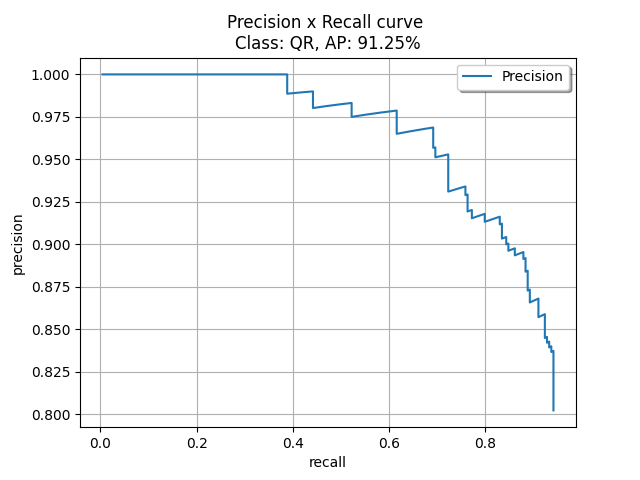

In [ ]:
from IPython.display import Image
Image('/content/results/QR.png')

Con el entrenamiento dado, se obtuvo una red que llega a un alto nivel de preción promedio, si se quisiera generalizar más los códigos QR, se podrían usar imágenenes más variadas, con sombras sobre el código para que reconozca que el cambio del color de fondo no indica como tal que el código está detrás de algo. En general, la red obtenida, con el dataset limitado como este, se obtuvieron unos resultados muy satisfactorios